In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('datatab.xlsx')
df

,meantemp,meantemp1,meantemp2,humidity,wind_speed
0,7.166667,7.400000,10.000000,87.000000,4.633333
1,8.666667,7.166667,7.400000,71.333333,1.233333
2,6.000000,8.666667,7.166667,86.833333,3.700000
3,7.000000,6.000000,8.666667,82.800000,1.480000
4,7.000000,7.000000,6.000000,78.600000,6.300000
...,...,...,...,...,...
1455,17.217391,16.850000,17.142857,68.043478,3.547826
1456,15.238095,17.217391,16.850000,87.857143,6.000000
1457,14.095238,15.238095,17.217391,89.666667,6.266667
1458,15.052632,14.095238,15.238095,87.000000,7.325000


## Set up the dependent and independent variables

In [2]:
X = pd.DataFrame(df[['meantemp1', 'meantemp2', 'humidity', 'wind_speed']])
y = pd.DataFrame(df[['meantemp']])

## Independent Variables

In [3]:
X

,meantemp1,meantemp2,humidity,wind_speed
0,7.400000,10.000000,87.000000,4.633333
1,7.166667,7.400000,71.333333,1.233333
2,8.666667,7.166667,86.833333,3.700000
3,6.000000,8.666667,82.800000,1.480000
4,7.000000,6.000000,78.600000,6.300000
...,...,...,...,...
1455,16.850000,17.142857,68.043478,3.547826
1456,17.217391,16.850000,87.857143,6.000000
1457,15.238095,17.217391,89.666667,6.266667
1458,14.095238,15.238095,87.000000,7.325000


## Dependent Variable

In [4]:
y

,meantemp
0,7.166667
1,8.666667
2,6.000000
3,7.000000
4,7.000000
...,...
1455,17.217391
1456,15.238095
1457,14.095238
1458,15.052632


## Divide data into test and train sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 4)
(292, 4)
(1168, 1)
(292, 1)


## Train the algorithm

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Control the coefficients the model chosen

In [8]:
v = pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w = pd.DataFrame(X.columns, columns=['Attribute'])

In [9]:
coeff_df = pd.concat([w,v], axis=1, join='inner')
coeff_df

,Attribute,Co-efficient
0,meantemp1,0.759722
1,meantemp2,0.171682
2,humidity,-0.037153
3,wind_speed,-0.000063


## Comparing Predicted value to the actual value

In [10]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted meantemp'])
y_pred

,Predicted meantemp
0,12.704275
1,30.657839
2,24.431173
3,27.137855
4,24.892486
...,...
287,30.967333
288,35.822077
289,21.619176
290,20.407714


In [11]:
y_test

,meantemp
756,11.500000
923,33.375000
1423,24.294118
217,28.500000
653,24.000000
...,...
626,30.500000
1254,36.133333
1041,22.750000
432,20.714286


In [12]:
date = pd.read_excel('date.xlsx')
date

,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
287,2013-10-15
288,2013-10-16
289,2013-10-17
290,2013-10-18


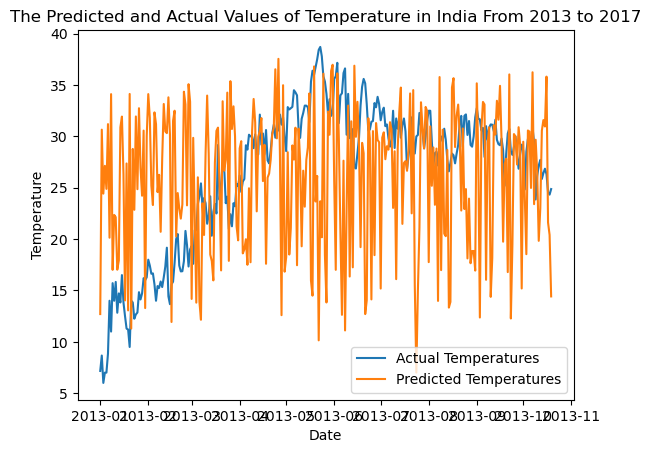

In [15]:
import matplotlib.pyplot as plt

x1 = date
x2 = date

y_show = df[['meantemp']].head(292)

y2 = y_pred

plt.plot(x1, y_show, label = 'Actual Temperatures')

plt.plot(x2, y2, label = 'Predicted Temperatures')

plt.legend(['Actual Temperatures', 'Predicted Temperatures'])

plt.xlabel('Date')

plt.ylabel('Temperature')

plt.title('The Predicted and Actual Values of Temperature in India From 2013 to 2017')

plt.show()

## Evaluate the algorithm

In [14]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1642328834419773
Mean Squared Error: 2.234374079647793
Root Mean Squared Error: 1.4947822850327712
